## Evaluating Logistic Regression

#### I will be exercising the learning material on the breast cancer data from yesterday.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Creating the DataFrame
wisconsin_data = pd.read_excel('Wisconsin_BreastCancer_data.xlsx')
breast_cancer_df = pd.DataFrame(wisconsin_data)

# Checking for missing values
missing_values = breast_cancer_df.isnull().sum()

# Converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
breast_cancer_df['diagnosis'] = label_encoder.fit_transform(breast_cancer_df['diagnosis'])
breast_cancer_df

# Splitting the dataset into features(X) and target variable(y)
X_bc = breast_cancer_df.drop(["diagnosis", 'id'], axis=1).values
y_bc = breast_cancer_df['diagnosis'].values

# Splitting the data into training and test sets
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Display the missing values and the shape of the dataset
missing_values, X_bc_train.shape, X_bc_test.shape, y_bc_train.shape, y_bc_test.shape

(id                         0
 diagnosis                  0
 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
 concave points_mean        0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
 dtype: int64,
 (455, 30),
 (114, 30),
 

In [4]:
# Training the model on the training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the model
bc_logreg = LogisticRegression(max_iter=10000)

# Fit the model
bc_logreg.fit(X_bc_train, y_bc_train)

LogisticRegression(max_iter=10000)

In [5]:
# Predicting the target variable for the test set
y_bc_pred = bc_logreg.predict(X_bc_test)

# Evaluating the model 
accuracy = accuracy_score(y_bc_test, y_bc_pred)
conf_matrix = confusion_matrix(y_bc_test, y_bc_pred)
class_report = classification_report(y_bc_test, y_bc_pred)
print(accuracy)
print(conf_matrix)
print(class_report)

0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Confusion Matrix

In [6]:
# This is quite confusing
conf_matrix

array([[70,  1],
       [ 4, 39]])

In [7]:
# Getting dataframe labels
from sklearn.utils.multiclass import unique_labels
unique_labels(y_bc_test)

array([0, 1])

In [10]:
# Combine the labels with the confusion metrics
def plot(y_bc_test, y_bc_pred):
    labels = unique_labels(y_bc_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(conf_matrix, columns= columns, index=index)
    return table

plot(y_bc_test, y_bc_pred)

,Predicted 0,Predicted 1
Actual 0,70,1
Actual 1,4,39


<Axes: >

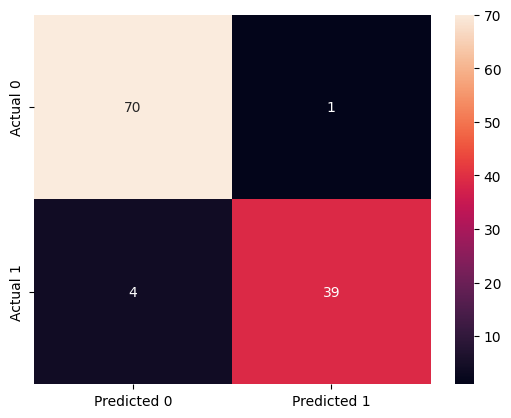

In [13]:
# Plotting the confusion matrix as a heatmap
import seaborn as sns
sns.heatmap(plot(y_bc_test, y_bc_pred), annot=True, fmt='d')

### Precision score

TP(True Positive) = 39 (Correctly predicted positive malignant diagnosis)

FP(False Positive) = 1 (Incorrectly predicted positive malignant diagnosis)

TN(True Negative) = 70 (Correctly predicted positive benign diagnosis)

FN(False Negative) = 4 (Incorrectly predicted positive benign diagnosis)

In [31]:
#True Positive 
TP = 39 #Correctly predicted positive malignant diagnosis

#False Positive
FP = 1 #Incorrectly predicted positive malignant diagnosis

#True Negative
TN = 70 #Correctly predicted positive benign diagnosis

#False Negative
FN = 4 #Incorrectly predicted positive benign diagnosis

#### Precision = TP/(TP + FP)

In [30]:
from sklearn.metrics import precision_score

# Calculating precision by hand
print(f'Precision for correctly predicting positive malignant diagnosis is: {TP/(TP + FP)}\n'
      f'Precision for correctly predicting positive benign diagnosis is: {TN/(TN + FN)}')

# Calculating precision for each class separately using the sklearn function
print(precision_score(y_bc_test, y_bc_pred, average=None))

Precision for correctly predicting positive malignant diagnosis is: 0.975
Precision for correctly predicting positive benign diagnosis is: 0.9459459459459459
[0.94594595 0.975     ]


### Recall = TP/(TP + FN)

In [33]:
from sklearn.metrics import recall_score

# Calculating recall by hand
print(f'Recall score for malignant is: {TP/(TP + FN)}\n'
      f'Recall score for belign is: {TN/(TN + FP)}')

# Calculating recall for each class separately using the sklearn function
recall = recall_score(y_bc_test, y_bc_pred, average=None)
print(f'Recall for class 1 (Malignant): {recall[1]}')
print(f'Recall for class 0 (Benign): {recall[0]}')


Recall score for malignant is: 0.9069767441860465
Recall score for belign is: 0.9859154929577465
Recall for class 1 (Malignant): 0.9069767441860465
Recall for class 0 (Benign): 0.9859154929577465


### F1 = 2(Precision * Recall)/ Precision + Recall

In [37]:
from sklearn.metrics import f1_score

# Calculating recall by hand
print(f'F1 score for malignant is: {2*(TP/(TP + FN)) * (TP/(TP + FP))/ ((TP/(TP + FN)) + (TP/(TP + FP)))}\n'
      f'F1 score for benign is: {2*(TN/(TN + FP)) * (TN/(TN + FN))/ ((TN/(TN + FP)) + (TN/(TN + FN)))}')

# Calculating recall for each class separately using the sklearn function
f1 = f1_score(y_bc_test, y_bc_pred, average=None)
print(f'F1-score for class 1 (Malignant): {f1[1]}')
print(f'F1-score for class 0 (Benign): {f1[0]}')

F1 score for malignant is: 0.9397590361445783
F1 score for benign is: 0.9655172413793103
F1-score for class 1 (Malignant): 0.9397590361445783
F1-score for class 0 (Benign): 0.9655172413793103


#### Classification Report (all the metrics can be found here)

In [39]:
class_report = classification_report(y_bc_test, y_bc_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## K Nearest Neighbours Algorithm

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Installing K Nearest Neighbor Classifier and fitting the model
knn = KNeighborsClassifier(n_neighbors=20) # The value of n has been chosen through trial and error based on the accuracy score
knn.fit(X_bc_train, y_bc_train)

# Printing accuracy of the model
print(f'The accuracy of the knn model is: {knn.score(X_bc_test, y_bc_test)}')

The accuracy of the knn model is: 0.9649122807017544


In [69]:
# Prediction using the knn model
y_knn_pred = knn.predict(X_bc_test)

# Evaluating the model
cm= confusion_matrix(y_bc_test, y_knn_pred)
class_report_knn = classification_report(y_bc_test, y_knn_pred)

print(cm)
print(class_report_knn)

[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(50.722222222222214, 0.5, 'Truth')

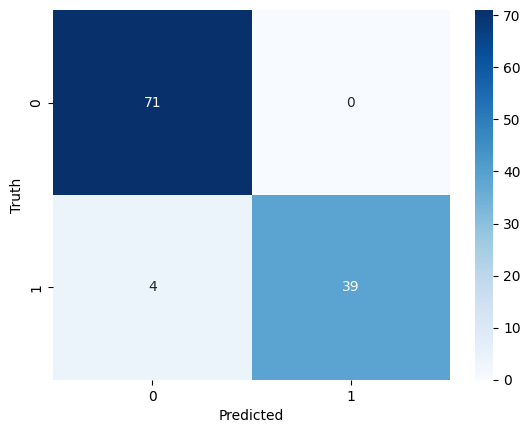

In [68]:
# Plotting the confusion matrix into a heatmap for better visualisation
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Comparison

In [70]:
# Logistic Regression model
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [71]:
# knn model
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



After comparing the confusion matrix of both models, we can see that the knn model correctly classified the diagnostic as benign at a difference of 1. Hence, the precision score is higher for the knn model. 

The recall score is also higher for the knn model for class label malignant, meaning that the model correctly predicted more positive instances.

Therefore, the f1-score is higher for the knn model for the class label benign, meaning a better balance between precision and recall.